In [24]:
import os
import numpy as np
import pandas

# Assuming this script is in the same directory level as the 'input' folder
# Get the path to the 'input' directory
input_dir = os.path.join(os.getcwd(), 'input')

# Check if the 'input' directory exists
if os.path.exists(input_dir):
    # List all subdirectories in the 'input' directory
    subdirectories = os.listdir(input_dir)
    print("Subdirectories in 'input':")
    for subdir in subdirectories:
        print(subdir)
else:
    print(f"The directory {input_dir} does not exist.")


Subdirectories in 'input':
bishop_resized
knight-resize
pawn_resized
Queen-Resized
Rook-resize


In [25]:
# Correct paths. 'input' is at the same level as the script
Rooks = 'input/Rook-resize'
Pawns = 'input/pawn_resized'
Knights = 'input/knight-resize'
Queens = 'input/Queen-Resized'
Bishops = 'input/bishop_resized'
classes = [Rooks, Pawns, Knights, Queens, Bishops]

In [26]:
import cv2
"""
def feature_builder(clss):
    lst = []
    for img in os.listdir(clss):
        f = cv2.imread(os.path.join(clss,img))
        f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)        #convert colored images into grayscale format
        f = cv2.resize(f , (50,50))
        f = f / 255.0 #potential depricatipn candidate
        f = np.expand_dims(f, axis=-1)
        lst.append(f)
    return lst"""
"""
def feature_builder(clss):
    lst = []
    for img in os.listdir(clss):
        f = cv2.imread(os.path.join(clss, img), cv2.IMREAD_GRAYSCALE)  # Read image in grayscale directly
        f = cv2.resize(f, (100, 100))
        f = f / 255.0  # Normalize the image data to 0-1
        f = np.expand_dims(f, axis=-1)  # Add channel dimension
        lst.append(f)
    return lst"""
def feature_builder(clss):
    lst = []
    for img in os.listdir(clss):
        # Read image in color (default behavior of cv2.imread)
        f = cv2.imread(os.path.join(clss, img))
        # Resize the image
        #f = cv2.resize(f, (224, 224))
        f = cv2.resize(f, (100, 100))
        # Normalize the image data to 0-1
        f = f / 255.0
        # Append the processed image to the list
        lst.append(f)
    return lst

In [27]:
features = []
for c in classes:
    features += feature_builder(c)


    

In [28]:
X = np.array(features)#convert to compatable numpy array
X = X.reshape(-1, 100, 100, 3)

In [29]:
#Label extraction
labels = []
count = 0
for c in classes:
    for img in os.listdir(c):
        labels.append(count)
    count += 1
    

In [30]:
Y = np.array(labels)

In [31]:
#Process x and y lists
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical, normalize

#X = X.reshape(651,2500) #flatten the input for the model
#X = normalize(X) #make sure that x has values between 0 and 1
Y = to_categorical(Y)
print(Y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [32]:
from sklearn.model_selection import train_test_split
#train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)
X_train.shape

(520, 100, 100, 3)

In [33]:
from  keras.models import Sequential

data_augmentation = tf.keras.Sequential(
  [
    #tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.025),
    tf.keras.layers.RandomBrightness(factor=0.01),
    #tf.keras.layers.RandomContrast(factor=0.01)
  ]
)

In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import MobileNet

#mobilelayer = MobileNet(include_top='True', weights='imagenet' ,input_tensor = (X),
                       #input_shape = (224, 224, 3))

model = models.Sequential()
#model.add(data_augmentation)
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(mobilelayer)
#model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

Epoch 1/15
17/17 [==============================] - 11s 537ms/step - loss: 1.6855 - accuracy: 0.2538 - val_loss: 1.5350 - val_accuracy: 0.3359
Epoch 2/15
17/17 [==============================] - 7s 418ms/step - loss: 1.4532 - accuracy: 0.3865 - val_loss: 1.4632 - val_accuracy: 0.4122
Epoch 3/15
17/17 [==============================] - 11s 655ms/step - loss: 1.2357 - accuracy: 0.5115 - val_loss: 1.4330 - val_accuracy: 0.4351
Epoch 4/15
17/17 [==============================] - 9s 522ms/step - loss: 1.0175 - accuracy: 0.6115 - val_loss: 1.3909 - val_accuracy: 0.4809
Epoch 5/15
17/17 [==============================] - 10s 568ms/step - loss: 0.8314 - accuracy: 0.7038 - val_loss: 1.4150 - val_accuracy: 0.5191
Epoch 6/15
17/17 [==============================] - 10s 602ms/step - loss: 0.6447 - accuracy: 0.7769 - val_loss: 1.3748 - val_accuracy: 0.5191
Epoch 7/15
17/17 [==============================] - 14s 829ms/step - loss: 0.5282 - accuracy: 0.8385 - val_loss: 1.4514 - val_accuracy: 0.5496
E

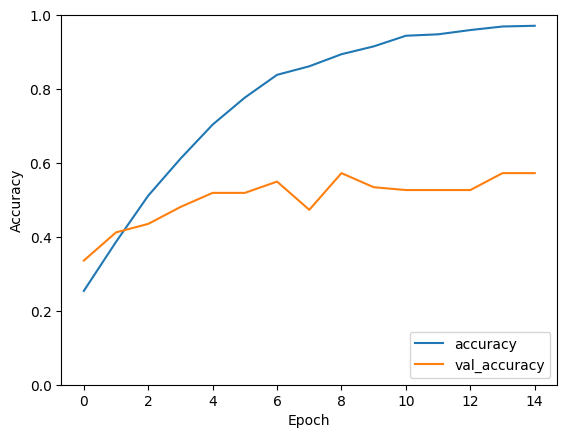

In [35]:
from keras.callbacks import EarlyStopping 

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = [EarlyStopping(monitor='val_loss', patience = 20 , restore_best_weights=True)]

history = model.fit(X_train, Y_train, epochs=15, 
                    validation_data=(X_test, Y_test), callbacks=callback)



import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)